# 0.load module

In [1]:
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['pdf.fonttype'] = 42

In [2]:
%env save_dir = /home/lzz/hic/output/PC/
save_dir = '/home/lzz/hic/output/PC/'

env: save_dir=/home/lzz/hic/output/PC/


# 1.makeTagDirectory

The section will consume most of memory, A high-performance computing cluster will be required.

On Figshare, we provide all Hi-C files in H5 format because the validPair files are very large. Therefore, you must first convert the H5 files to Homer files, not the validPair files.

In [ ]:
%%bash
ls /home/u2204084007/cluster/HiC/data/*/*validPairs | sed 's/.validPairs//' | while read id; do \
echo ${id}
cat ${id}.validPairs | awk 'BEGIN{FS=OFS="\t"}{print $1,$2,$3,$4,$5,$6,$7}' > ${id}.homer;
done

In [ ]:
%%bash
ls /home/u2204084007/cluster/HiC/data/*/*validPairs | sed 's/.validPairs//' | head -n1 | while read id; do \
echo ${id}
makeTagDirectory ${id} -format HiCsummary ${id}.homer;
done

## 1.1 Set Tag env

In [3]:
%env s1_tag = /home/lzz/hic/data/S1
%env s2_tag = /home/lzz/hic/data/S2
%env b1_tag = /home/lzz/hic/data/B1
%env b2_tag = /home/lzz/hic/data/B2
%env b3_tag = /home/lzz/hic/data/B3

env: s1_tag=/home/lzz/hic/data/S1
env: s2_tag=/home/lzz/hic/data/S2
env: b1_tag=/home/lzz/hic/data/B1
env: b2_tag=/home/lzz/hic/data/B2
env: b3_tag=/home/lzz/hic/data/B3


# 2.analyzeHiC

In [ ]:
%%bash
source ~/.bashrc
ls /home/u2204084007/cluster/HiC/data/*/*.homer | sed 's/.homer//' | while read id; do \
echo ${id}
analyzeHiC ${id} -res 40000 -window 80000 -balance -corr -cpu 12 -o ${id}_40x80k_pearson.txt;
done

# 3.runHiCpca

In [ ]:
%%bash
ls /home/u2204084007/cluster/HiC/data/*/*.homer | sed 's/.homer//' | while read id; do \
echo ${id}
runHiCpca.pl auto ${id} -res 40000 -window 80000 -genome mm10 -cpu 12;
done

In [4]:
%env s1_pc1 = /home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph
%env s2_pc1 = /home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph
%env b1_pc1 = /home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph
%env b2_pc1 = /home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph
%env b3_pc1 = /home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph


env: s1_pc1=/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph
env: s2_pc1=/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph
env: b1_pc1=/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph
env: b2_pc1=/home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph
env: b3_pc1=/home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph


# 4.AnnotatePeaks

In [12]:
%%bash
source ~/.bashrc
annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph $s1_pc1 $s2_pc1 $b1_pc1 $b2_pc1 $b3_pc1 > $save_dir/ABpeak_intergrated_output.txt


	Peak file = /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt
	Genome = mm10
	Organism = mouse
	Will remove rows with data values of '' or 'NA'
	bedGraph Files:
		/home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph
		/home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph
		/home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph
		/home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph
		/home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph
	Peak/BED file conversion summary:
		BED/Header formatted lines: 0
		peakfile formatted lines: 63688
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 63688
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Reading Positions...
	-----------------------
	offset=0
	Finding Closest

In [9]:
output_table = pd.read_csv(f'{save_dir}ABpeak_intergrated_output.txt', sep='\t')
old_names = output_table.columns.to_list()
column_names = [old_names[0]] + old_names[-5:]
new_name = dict(zip(column_names, ['PeakID', 'PBS1', 'PBS2', 'BLM1', 'BLM2', 'BLM3']))

output_table.rename(
    columns=new_name,
    inplace=True)
print(output_table.shape)
output_table.head()

(63643, 24)


,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,PBS1,PBS2,BLM1,BLM2,BLM3
0,chrX-162840000,chrX,162840000,162880000,+,1.931757,NaN,"intron (NM_025932, intron 6 of 8)","intron (NM_025932, intron 6 of 8)",14995,...,ENSMUSG00000092752,Mir3473a,Mir3473|mir-3473a|mmu-mir-3473|mmu-mir-3473a,microRNA 3473a,ncRNA,1.932,1.794,1.630,1.968,1.408
1,chrX-101560000,chrX,101560000,101600000,+,1.885074,NaN,"intron (NM_001290729, intron 32 of 38)","intron (NM_001290729, intron 32 of 38)",47265,...,ENSMUSG00000031314,Taf1,AU015687|B430306D02Rik|Ccg-1|Ccg1|KAT4|N-TAF1|...,TATA-box binding protein associated factor 1,protein-coding,1.885,1.802,1.784,1.800,1.568
2,chrX-162880000,chrX,162880000,162920000,+,1.873641,NaN,"intron (NR_038088, intron 3 of 5)",Lx9|LINE|L1,-1268,...,ENSMUSG00000031360,Ctps2,A830031M15Rik|AI326475|Ctpsh,cytidine 5'-triphosphate synthase 2,protein-coding,1.874,1.876,1.646,1.989,1.554
3,chrX-160520000,chrX,160520000,160560000,+,1.872020,NaN,"intron (NM_001177878, intron 7 of 32)",L1Md_A|LINE|L1,37838,...,ENSMUSG00000031295,Phka2,6330505C01Rik|D330034O08|Phk,phosphorylase kinase alpha 2,protein-coding,1.872,1.839,1.507,1.676,1.532
4,chrX-101920000,chrX,101920000,101960000,+,1.861861,NaN,"intron (NM_001163610, intron 1 of 7)","intron (NM_001163610, intron 1 of 7)",90615,...,ENSMUSG00000079481,Nhsl2,1110062M06Rik|6430511F03|AI225852|AW488865|EG6...,NHS-like 2,protein-coding,1.862,1.787,1.621,1.691,1.655


# 5.DiffExpression

In [129]:
%%bash
source ~/.bashrc
getDiffExpression.pl /home/lzz/hic/output/PC/ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0 > diffOutput.txt

	Treating input as file generated by annotatePeaks.pl (-peaks)
	Will report raw counts in output table (no normalization)
	Using limma to calculate differential expression/enrichment...
	Output Stats s vs. b:
		Total Genes: 63643
		Total Up-regulated in b vs. s: 305 (0.479%) [log2fold>0, FDR<0.05]
		Total Dn-regulated in b vs. s: 264 (0.415%) [log2fold<-0, FDR<0.05]

		Total continuous domains: 10 (Up) and 5 (Down)



## 5.1 volcano plot

In [24]:
diff = pd.read_csv(f'{save_dir}diffOutput.txt', sep='\t')
old_names = diff.columns.to_list()
old_names
column_names = [old_names[0]] + old_names[-8:-3]
new_name = dict(zip(column_names, ['PeakID', 'PBS1', 'PBS2', 'BLM1', 'BLM2', 'BLM3']))
diff.rename(
    columns=new_name,
    inplace=True)
diff.head()

,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,PBS1,PBS2,BLM1,BLM2,BLM3,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr2-149120000,chr2,149120000,149160000,+,-1.303001,NaN,Intergenic,Lx5c|LINE|L1,-264488,...,cystatin C,protein-coding,-1.303,-1.311,-1.285,-1.239,-1.393,0.001333,0.983438,0.992835
1,chr19-5480000,chr19,5480000,5520000,+,0.883121,NaN,"intron (NM_001024560, intron 1 of 12)",ORR1A4|LTR|ERVL-MaLR,3787,...,RIKEN cDNA 1700020D05 gene,protein-coding,0.883,0.953,0.676,0.954,0.793,-0.110333,0.249297,0.526154
2,chr6-131480000,chr6,131480000,131520000,+,-0.313352,NaN,Intergenic,Intergenic,13594,...,otolin-1-like,protein-coding,-0.313,-0.243,-0.089,-0.040,-0.229,0.158667,0.063498,0.271841
3,chr2-112080000,chr2,112080000,112120000,+,-0.987462,NaN,Intergenic,L1_Mur3|LINE|L1,-7301,...,olfactory receptor 1314,protein-coding,-0.987,-0.984,-1.024,-0.804,-1.001,0.042500,0.601725,0.800978
4,chr2-59760000,chr2,59760000,59800000,+,0.967106,NaN,"intron (NM_198294, intron 7 of 26)","intron (NM_198294, intron 7 of 26)",102606,...,"WD repeat, SAM and U-box domain containing 1",protein-coding,0.967,0.990,0.850,0.763,0.805,-0.172500,0.014704,0.140661


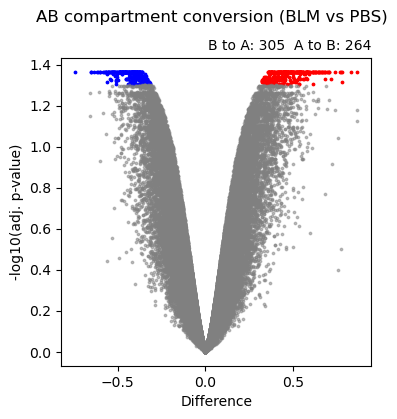

In [27]:
up_index = (diff['s vs. b Difference'] > 0 ) & (diff['s vs. b adj. p-value'] < 0.05)
down_index = (diff['s vs. b Difference'] < 0 ) & (diff['s vs. b adj. p-value'] < 0.05)
none_index = (diff['s vs. b adj. p-value'] >= 0.05)
diff['-log10(adj. p-value)'] = -1 * np.log10(diff['s vs. b adj. p-value'])
plt.figure(figsize=(4, 4))
plt.scatter(diff.loc[up_index, 's vs. b Difference'], diff.loc[up_index, '-log10(adj. p-value)'], c='red', s=3)
plt.scatter(diff.loc[down_index, 's vs. b Difference'], diff.loc[down_index, '-log10(adj. p-value)'], c='blue', s=3)
plt.scatter(diff.loc[none_index, 's vs. b Difference'], diff.loc[none_index, '-log10(adj. p-value)'], c='grey', s=3, alpha=0.5)
plt.xlabel('Difference')
plt.ylabel('-log10(adj. p-value)')
up_count = up_index.value_counts().iloc[1]
down_count = down_index.value_counts().iloc[1]
plt.title(f'B to A: {up_count:.0f}  A to B: {down_count:.0f}', loc='right', fontsize=10)
plt.suptitle('AB compartment conversion (BLM vs PBS)', x=0.5, y=1, fontsize=12)
plt.savefig(f'{save_dir}AB_compartment_conversion.png', dpi=300, bbox_inches='tight')


In [5]:
diff = pd.read_csv(f'{save_dir}regions.Up_b_vs_s.txt', sep='\t')
old_names = diff.columns.to_list()
column_names = [old_names[0]] + old_names[-8:-3]
new_name = dict(zip(column_names, ['PeakID', 'PBS1', 'PBS2', 'BLM1', 'BLM2', 'BLM3']))
diff.rename(
    columns=new_name,
    inplace=True)
diff

,PeakID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Gene Description,Gene Type,PBS1,PBS2,BLM1,BLM2,BLM3,s vs. b Difference,s vs. b p-value,s vs. b adj. p-value
0,chr10-130360000,chr10,130360000,130400000,+,-0.720641,NaN,Intergenic,Intergenic,14241,...,"vomeronasal 2, receptor 84",protein-coding,-0.721,-0.697,0.065,0.062,0.062,0.772000,0.000002,0.043094
1,chr18-81520000,chr18,81520000,81560000,+,-0.403031,NaN,Intergenic,(TG)n|Simple_repeat|Simple_repeat,452080,...,microRNA 5127,ncRNA,-0.403,-0.403,0.481,0.452,0.359,0.833667,0.000004,0.043094
2,chr12-115160000,chr12,115160000,115200000,+,-0.906716,NaN,Intergenic,ORR1A2-int|LTR|ERVL-MaLR,515794,...,microRNA 6388,ncRNA,-0.907,-0.931,-0.278,-0.281,-0.251,0.649000,0.000006,0.043094
3,chr6-40760000,chr6,40760000,40800000,+,-0.747445,NaN,Intergenic,B4A|SINE|B4,107494,...,"monooxygenase, DBH-like 2",protein-coding,-0.747,-0.758,-0.143,-0.108,-0.149,0.619167,0.000008,0.043094
4,chr7-106760000,chr7,106760000,106800000,+,-0.747274,NaN,Intergenic,L1_Mur3|LINE|L1,10999,...,olfactory receptor 699,protein-coding,-0.747,-0.792,0.061,-0.074,0.054,0.783167,0.000009,0.043094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,chrX-59440000,chrX,59440000,59480000,+,0.664108,NaN,"intron (NM_001290414, intron 2 of 6)",ORR1B1-int|LTR|ERVL-MaLR,107348,...,fibroblast growth factor 13,protein-coding,0.664,0.650,1.173,1.063,1.006,0.423667,0.000433,0.049240
301,chr11-83840000,chr11,83840000,83880000,+,0.338230,NaN,"intron (NM_001291268, intron 2 of 8)","intron (NM_001291268, intron 2 of 8)",7040,...,HNF1 homeobox B,protein-coding,0.338,0.321,0.851,0.778,0.671,0.437167,0.000433,0.049240
302,chr16-25240000,chr16,25240000,25280000,+,0.343308,NaN,Intergenic,Intergenic,-26817,...,transformation related protein 63 regulated,protein-coding,0.343,0.405,0.759,0.703,0.699,0.346333,0.000435,0.049346
303,chr13-52360000,chr13,52360000,52400000,+,0.550096,NaN,Intergenic,Intergenic,150836,...,"DIRAS family, GTP-binding RAS-like 2",protein-coding,0.550,0.657,0.981,0.957,1.048,0.391833,0.000442,0.049656


In [6]:
plot_df = diff['Chr'].value_counts().sort_values(ascending=False)

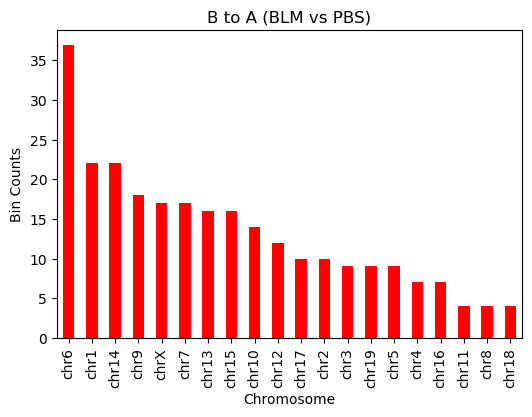

In [6]:
plot_df.plot.bar(figsize=(6, 4), color='Red')
plt.ylabel('Bin Counts')
plt.xlabel('Chromosome')
plt.title('B to A (BLM vs PBS)')
plt.savefig(f'{save_dir}Upregulated_chromatin_compartments.pdf', bbox_inches='tight')


In [9]:
plot_df = diff['Gene Name'].value_counts()[0:20].sort_values()
plot_df

Gene Name
Spef2             3
Klhl4             3
5430437J10Rik     3
Dock10            3
4930559C10Rik     3
Cd226             3
2210010C04Rik     3
4930404A05Rik     3
Chil4             3
Mir5127           4
Fgf13             4
Magi2             4
Xylt1             4
Gm41259           5
Trps1             5
Mir7094-2         6
Mir6388           6
H2afy3            7
Gm20740           9
Gm20125          10
Name: count, dtype: int64

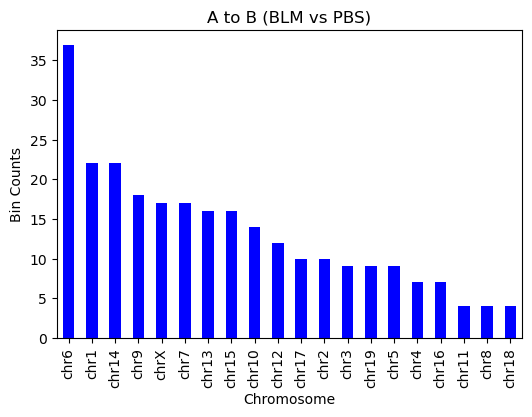

In [5]:
diff = pd.read_csv(f'{save_dir}regions.Down_b_vs_s.txt', sep='\t')
old_names = diff.columns.to_list()
column_names = [old_names[0]] + old_names[-8:-3]
new_name = dict(zip(column_names, ['PeakID', 'PBS1', 'PBS2', 'BLM1', 'BLM2', 'BLM3']))
diff.rename(
    columns=new_name,
    inplace=True)
diff

plot_df = diff['Chr'].value_counts().sort_values(ascending=False)
plot_df.plot.bar(figsize=(6, 4), color='Blue')
plt.xlabel('Chromosome')
plt.ylabel('Bin Counts')
plt.title('A to B (BLM vs PBS)')
plt.savefig(f'{save_dir}Downregulated_chromatin_compartments.pdf', bbox_inches='tight')

# 6.Histograms/Quantifying PC1 values at genomic features

In [7]:
%env save_dir=/home/lzz/hic/output/PC
save_dir='/home/lzz/hic/output/PC/'

env: save_dir=/home/lzz/hic/output/PC


In [8]:
%%bash
source ~/.bashrc
annotatePeaks.pl tss mm10 -size 1000000 -hist 1000 -bedGraph $s1_pc1 $s2_pc1 $b1_pc1 $b2_pc1 $b3_pc1 > $save_dir/tss_distance_histograms.txt


	Peak file = tss
	Genome = mm10
	Organism = mouse
	Peak Region set to 1000000
	-----------------------------------------------------
	Histogram mode activated (bin size = 1000 bp)
	-----------------------------------------------------
	bedGraph Files:
		/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph
	Found special file: /home/lzz/biotools/homer/.//data/genomes/mm10//mm10.tss

	*****************
	tss Mode enabled
	*****************

	Resizing peaks...
	Reading Positions...
	-----------------------
	Compiling per bp Histograms...
	Finding Tags in Peaks from each directory...
	10000
	20000
	30000
	40000
	10000
	20000
	30000
	40000
	10000
	20000
	30000
	40000
	10000
	20000
	30000
	40000
	10000
	20000
	30000
	40000



In [9]:
%%bash
source ~/.bashrc
annotatePeaks.pl tss mm10 -size 1000 -bedGraph $s1_pc1 $s2_pc1 $b1_pc1 $b2_pc1 $b3_pc1 > $save_dir/tss_100_pc1value.txt


	Peak file = tss
	Genome = mm10
	Organism = mouse
	Peak Region set to 1000
	bedGraph Files:
		/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph
		/home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph
	Found special file: /home/lzz/biotools/homer/.//data/genomes/mm10//mm10.tss

	*****************
	tss Mode enabled
	*****************

	Resizing peaks...
	Reading Positions...
	-----------------------
	Annotating:....................................
		Annotation	Number of peaks	Total size (bp)	Log2 Ratio (obs/exp)	LogP enrichment (+values depleted)
		3UTR	0.0	20772009	-8.389	332.979
		miRNA	0.0	31126	-0.582	0.497
		ncRNA	0.0	3444819	-5.809	55.045
		TTS	0.0	27356023	-8.789	439.057
		pseudo	0.0	573075	-3.344	9.152
		Exon	0.0	34669794	-9.134	557.195
		Intron	0.0	950414298	-14.509	18665.325
		Intergenic	0.0	1654256804	-16.038	40656.822
		Promoter	43502.0	30250840

## 6.1 plot Histograms

In [10]:
histogram_data = pd.read_csv(f'{save_dir}/tss_distance_histograms.txt', sep='\t')
print(histogram_data.columns)
new_name = [
    'Distance', 'PBS1_Coverage', 's1_PTag', 's1_NTag',
    'PBS2_Coverage', 's2_PTag', 's2_NTag',
    'BLM1_Coverage', 'b1_PTag', 'b1_NTag',
    'BLM2_Coverage', 'b2_PTag', 'b2_NTag',
    'BLM3_Coverage', 'b3_PTag', 'b3_NTag',
]
name_dict = zip(histogram_data.columns, new_name)
histogram_data.rename(columns=dict(name_dict), inplace=True)
histogram_data.head()

Index(['Distance from Center (cmd=annotatePeaks.pl tss mm10 -size 1000000 -hist 1000 -bedGraph /home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph /home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph /home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph /home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph /home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph)',
       '/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph Coverage',
       '/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph + Tags',
       '/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph - Tags',
       '/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph Coverage',
       '/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph + Tags',
       '/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph - Tags',
       '/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph Coverage',
       '/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph + Tags',
       '/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph - Tags',
       '/home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph Coverage',
       '/home/lzz/hic/data/B2/B2.4

,Distance,PBS1_Coverage,s1_PTag,s1_NTag,PBS2_Coverage,s2_PTag,s2_NTag,BLM1_Coverage,b1_PTag,b1_NTag,BLM2_Coverage,b2_PTag,b2_NTag,BLM3_Coverage,b3_PTag,b3_NTag
0,-500000,0.469303,0.000012,0.000012,0.469955,0.000012,0.000012,0.469874,0.000012,0.000012,0.472275,0.000012,0.000012,0.476189,0.000012,0.000012
1,-499000,0.469419,0.000013,0.000012,0.470082,0.000013,0.000012,0.470093,0.000013,0.000012,0.472515,0.000013,0.000012,0.476439,0.000012,0.000012
2,-498000,0.469639,0.000013,0.000013,0.470279,0.000013,0.000013,0.470369,0.000013,0.000013,0.472784,0.000013,0.000013,0.476908,0.000013,0.000012
3,-497000,0.469516,0.000013,0.000013,0.470194,0.000013,0.000014,0.470228,0.000013,0.000014,0.472824,0.000014,0.000014,0.476937,0.000014,0.000014
4,-496000,0.470028,0.000012,0.000011,0.470782,0.000012,0.000011,0.470607,0.000012,0.000011,0.473692,0.000012,0.000011,0.477279,0.000012,0.000011


In [56]:
abs(histogram_data['Distance'])

0       500000
1       499000
2       498000
3       497000
4       496000
         ...  
996     496000
997     497000
998     498000
999     499000
1000    500000
Name: Distance, Length: 1001, dtype: int64

In [77]:
row_index = abs(histogram_data['Distance']) <= 160000
row_index

0       False
1       False
2       False
3       False
4       False
        ...  
996     False
997     False
998     False
999     False
1000    False
Name: Distance, Length: 1001, dtype: bool

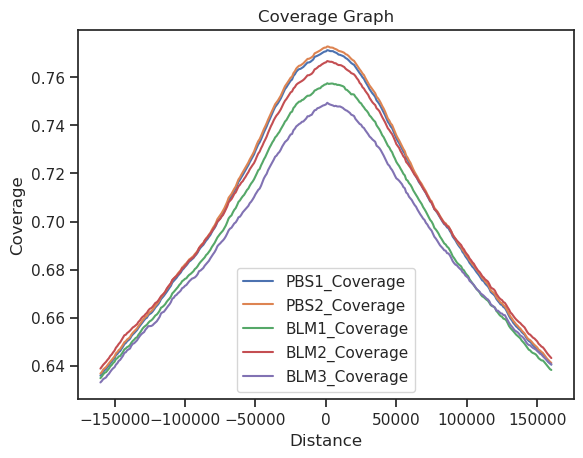

In [78]:
histogram_data.loc[row_index, ['Distance', 'PBS1_Coverage', 'PBS2_Coverage', 'BLM1_Coverage', 'BLM2_Coverage', 'BLM3_Coverage']].plot(x='Distance')
plt.xlabel('Distance')
plt.ylabel('Coverage')
plt.title('Coverage Graph')
plt.savefig(f'{save_dir}/Coverage_Graph.png', dpi=300, bbox_inches='tight')


In [46]:
pca_data = histogram_data[['PBS1_Coverage', 'PBS2_Coverage', 'BLM1_Coverage', 'BLM2_Coverage', 'BLM3_Coverage',]]
pca_data = pca_data.dropna().T

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# # construct a dataframe using pandas
# df1=pd.DataFrame(data['data'],columns=data['feature_names'])
 
# # Scale data before applying PCA
# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(df1)
# Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(pca_data)
x=principal.transform(pca_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(5, 2)


In [48]:
principal.explained_variance_ratio_

array([0.832658 , 0.1488057])

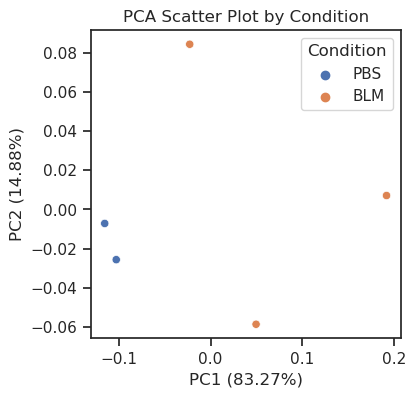

In [49]:
sns.set(style="ticks")
import seaborn as sns
plt.figure(figsize=(4,4))
hue_meta = pd.DataFrame({'Condition': ['PBS'] * 2 + ['BLM'] * 3}, index=pca_data.index)
sns.scatterplot(x = x[:,0], y = x[:,1], hue=hue_meta['Condition'])
plt.xlabel('PC1' + ' (' + str(round(principal.explained_variance_ratio_[0]*100, 2)) + '%)')
plt.ylabel('PC2' + ' (' + str(round(principal.explained_variance_ratio_[1]*100, 2)) + '%)')
plt.title('PCA Scatter Plot by Condition')
plt.savefig(save_dir+"Coverage_PCA.pdf", bbox_inches='tight')

## 6.2 plot scatter plot

In [19]:
output_table = pd.read_csv(f'{save_dir}/tss_100_pc1value.txt', sep='\t')
old_names = output_table.columns.to_list()
column_names = [old_names[0]] + old_names[-5:]
new_name = dict(zip(column_names, ['PeakID', 'PBS1', 'PBS2', 'BLM1', 'BLM2', 'BLM3']))

output_table.rename(
    columns=new_name,
    inplace=True)
output_table.head()

,PeakID,Chr,Start,End,Strand,Not Used,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,...,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,PBS1,PBS2,BLM1,BLM2,BLM3
0,NM_001081319,chr19,29521782,29522782,+,0,NaN,promoter-TSS (NM_001081319),promoter-TSS (NM_001081319),0,...,ENSMUSG00000038658,Ric1,C030046E11Rik|C130057E09Rik|Kiaa1432,RAB6A GEF complex partner 1,protein-coding,1.327,1.296,1.244,1.245,1.341
1,NM_007901,chr3,115714555,115715555,-,0,NaN,promoter-TSS (NM_007901),promoter-TSS (NM_007901),0,...,ENSMUSG00000045092,S1pr1,AI849002|Edg1|Lpb1|S1p|S1p1,sphingosine-1-phosphate receptor 1,protein-coding,1.407,1.390,1.509,1.480,1.521
2,NM_011794,chr1,185331659,185332659,+,0,NaN,promoter-TSS (NM_011794),promoter-TSS (NM_011794),0,...,ENSMUSG00000026617,Bpnt1,BPntase,bisphosphate 3'-nucleotidase 1,protein-coding,1.302,1.314,1.293,1.252,1.242
3,NM_001177754,chr2,11501590,11502590,-,0,NaN,promoter-TSS (NM_133232),promoter-TSS (NM_133232),0,...,ENSMUSG00000026773,Pfkfb3,E330010H22Rik|iPFK-2|uPFK-2,"6-phosphofructo-2-kinase/fructose-2,6-biphosph...",protein-coding,0.788,0.841,0.745,0.793,0.917
4,NM_001081293,chr3,95818453,95819453,-,0,NaN,promoter-TSS (NM_001081293),promoter-TSS (NM_001081293),0,...,ENSMUSG00000028106,Rprd2,2810036A19Rik|4930535B03Rik|6720469I21Rik|AL02...,regulation of nuclear pre-mRNA domain containi...,protein-coding,1.024,0.999,1.178,1.121,0.976


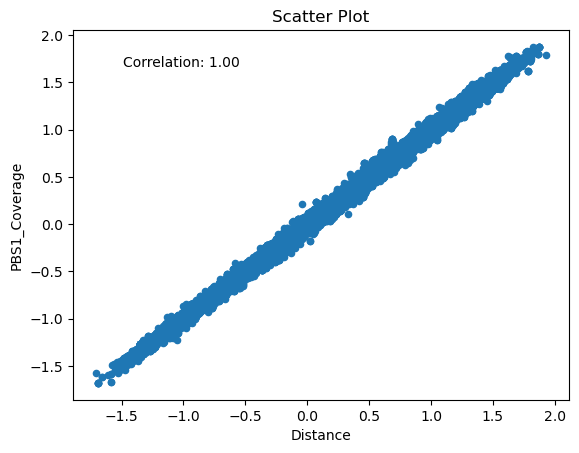

In [20]:
correlation = output_table['PBS1'].corr(output_table['PBS2'])
output_table.plot.scatter(x='PBS1', y='PBS2')
plt.xlabel('Distance')
plt.ylabel('PBS1_Coverage')
plt.title('Scatter Plot')
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()



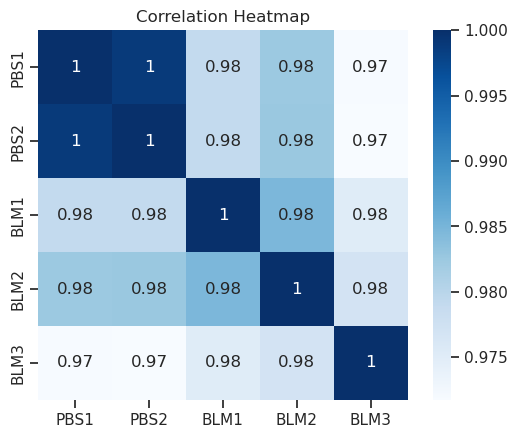

In [86]:
columns_to_plot = output_table.columns[-5:]
correlation_data = output_table[columns_to_plot].corr()

sns.heatmap(correlation_data, annot=True, cmap='Blues', square=True)  # Set square=True to create a square heatmap
plt.title('Correlation Heatmap')
plt.savefig(f'{save_dir}Correlation_Heatmap.png', dpi=300, bbox_inches='tight')


In [41]:
pca_data = output_table[columns_to_plot]
pca_data = pca_data.dropna().T

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# # construct a dataframe using pandas
# df1=pd.DataFrame(data['data'],columns=data['feature_names'])
 
# # Scale data before applying PCA
# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(df1)
# Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(pca_data)
x=principal.transform(pca_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(5, 2)


In [43]:
principal.explained_variance_ratio_

array([0.49207396, 0.3072293 ])

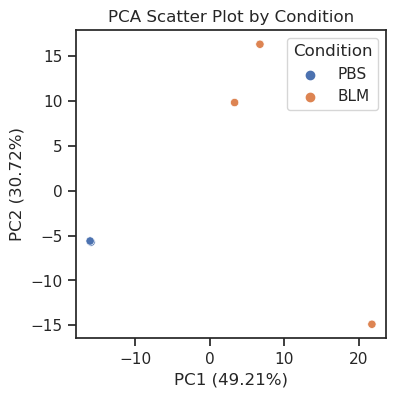

In [45]:

sns.set(style="ticks")
import seaborn as sns
plt.figure(figsize=(4,4))
hue_meta = pd.DataFrame({'Condition': ['PBS'] * 2 + ['BLM'] * 3}, index=pca_data.index)
sns.scatterplot(x = x[:,0], y = x[:,1], hue=hue_meta['Condition'])
plt.xlabel('PC1' + ' (' + str(round(principal.explained_variance_ratio_[0]*100, 2)) + '%)')
plt.ylabel('PC2' + ' (' + str(round(principal.explained_variance_ratio_[1]*100, 2)) + '%)')
plt.title('PCA Scatter Plot by Condition')
plt.savefig(save_dir+"PCA.pdf", bbox_inches='tight')